In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
# Remplacez 'votre_fichier.csv' par le chemin réel de votre fichier CSV.
df_btc = pd.read_csv('../CSV/BTC.csv', parse_dates=['Date'])
df_sp500 = pd.read_csv('../CSV/S&P500.csv', parse_dates=['Date'])
df_gold = pd.read_csv('../CSV/XAU(GOLD).csv', parse_dates=['Date'])

# Facultatif : mettre la date en index
#df_btc.set_index('Date', inplace=True)
#df_sp500.set_index('Date', inplace=True)
#df_gold.set_index('Date', inplace=True)


In [122]:
print("Statistiques descriptives pour BTC :")
print(df_btc.describe())

print("\nStatistiques descriptives pour S&P500 :")
print(df_sp500.describe())

print("\nStatistiques descriptives pour GOLD :")
print(df_gold.describe())


Statistiques descriptives pour BTC :
                                Date     Close/Last  Volume           Open  \
count                           1883    1883.000000     0.0    1883.000000   
mean   2022-01-16 23:28:38.746680832   34040.240998     NaN   34020.393840   
min              2019-03-08 00:00:00    3864.900000     NaN    3864.600000   
25%              2020-08-26 12:00:00   11361.600000     NaN   11368.050000   
50%              2021-12-10 00:00:00   28285.600000     NaN   28203.900000   
75%              2023-03-29 12:00:00   50395.100000     NaN   50709.850000   
max              2025-02-09 00:00:00  106484.000000     NaN  106504.000000   
std                              NaN   24396.582505     NaN   24382.936974   

               High            Low  
count    1883.00000    1883.000000  
mean    34367.86240   33718.551832  
min      3894.70000    3810.700000  
25%     11408.80000   11229.700000  
50%     28460.30000   28109.200000  
75%     51436.25000   49898.250000  
m

In [123]:
df_btc.head()

,Date,Close/Last,Volume,Open,High,Low
0,2025-02-09,96852.7,NaN,96218.7,97297.8,96369.0
1,2025-02-08,96623.3,NaN,95981.2,96862.8,95716.1
2,2025-02-07,96402.1,NaN,97460.6,96862.8,96237.1
3,2025-02-06,97467.5,NaN,97623.4,97872.2,96424.2
4,2025-02-05,97631.2,NaN,98042.5,97824.0,96510.6


In [124]:
df_btc=df_btc.drop(columns=["Volume"],axis=1)
df_gold=df_gold.drop(columns=["Volume"],axis=1)

In [125]:
df_btc.head()

,Date,Close/Last,Open,High,Low
0,2025-02-09,96852.7,96218.7,97297.8,96369.0
1,2025-02-08,96623.3,95981.2,96862.8,95716.1
2,2025-02-07,96402.1,97460.6,96862.8,96237.1
3,2025-02-06,97467.5,97623.4,97872.2,96424.2
4,2025-02-05,97631.2,98042.5,97824.0,96510.6


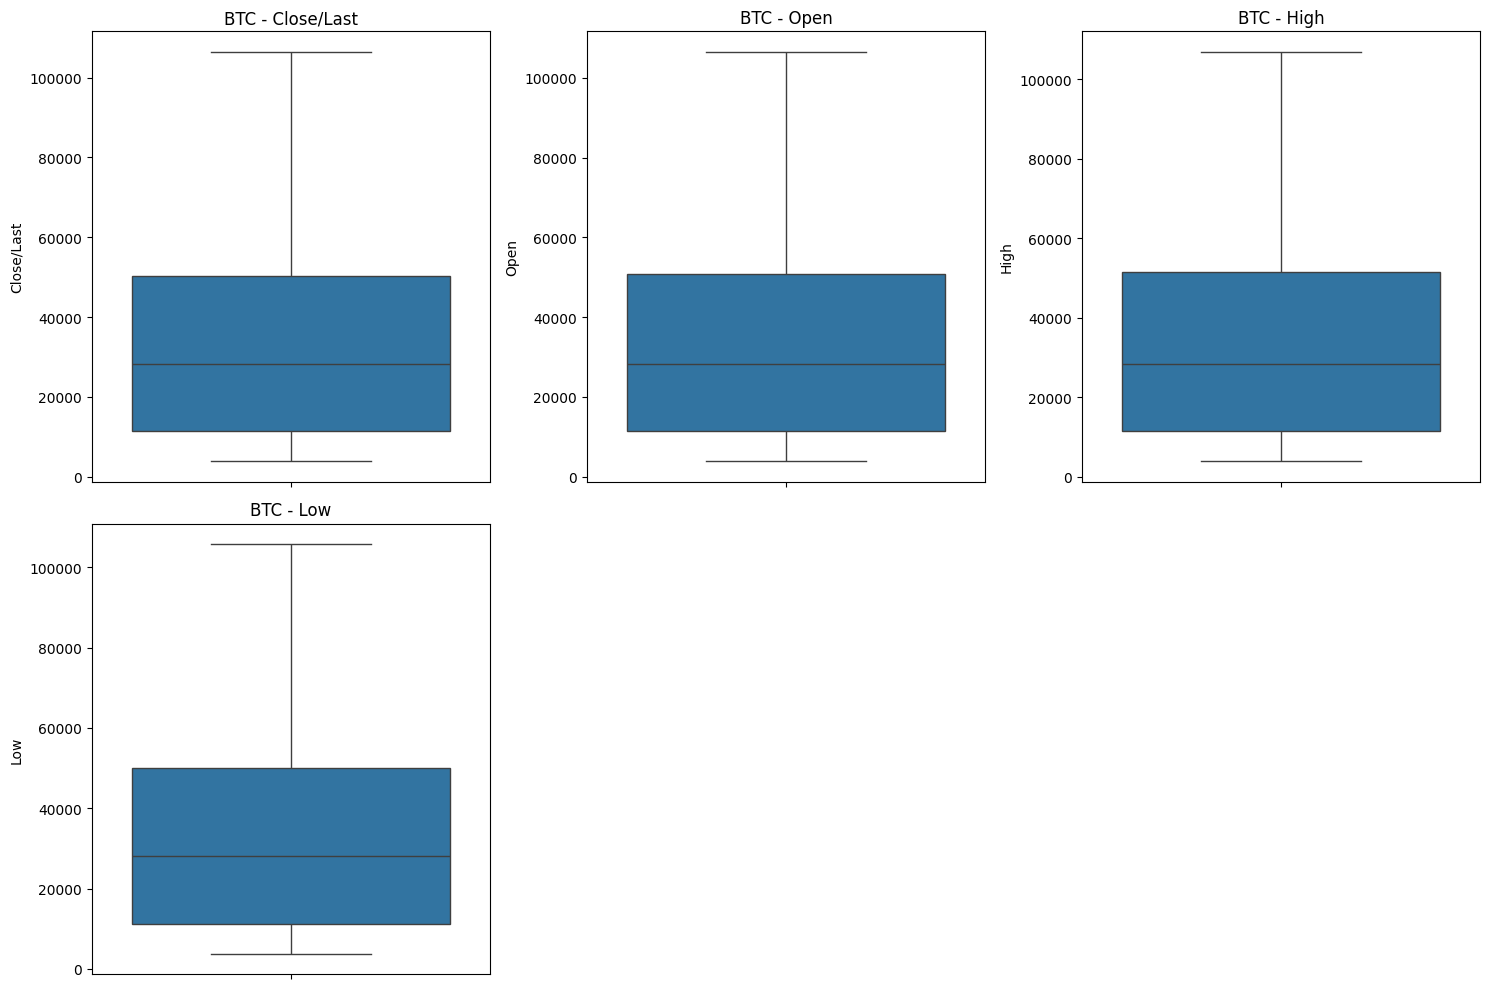

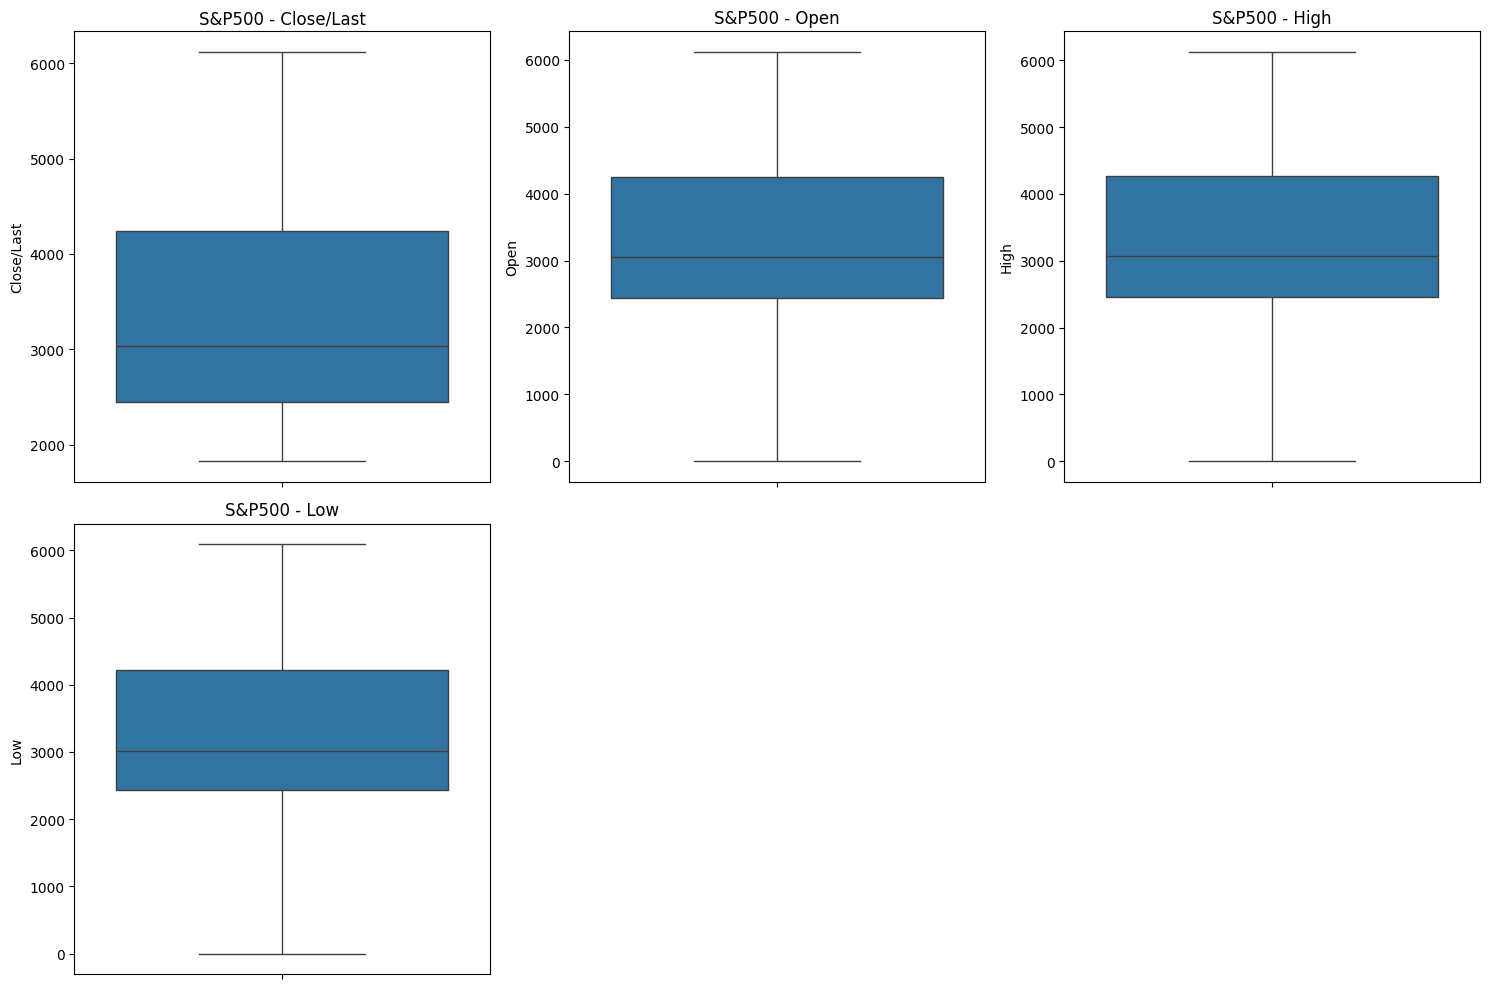

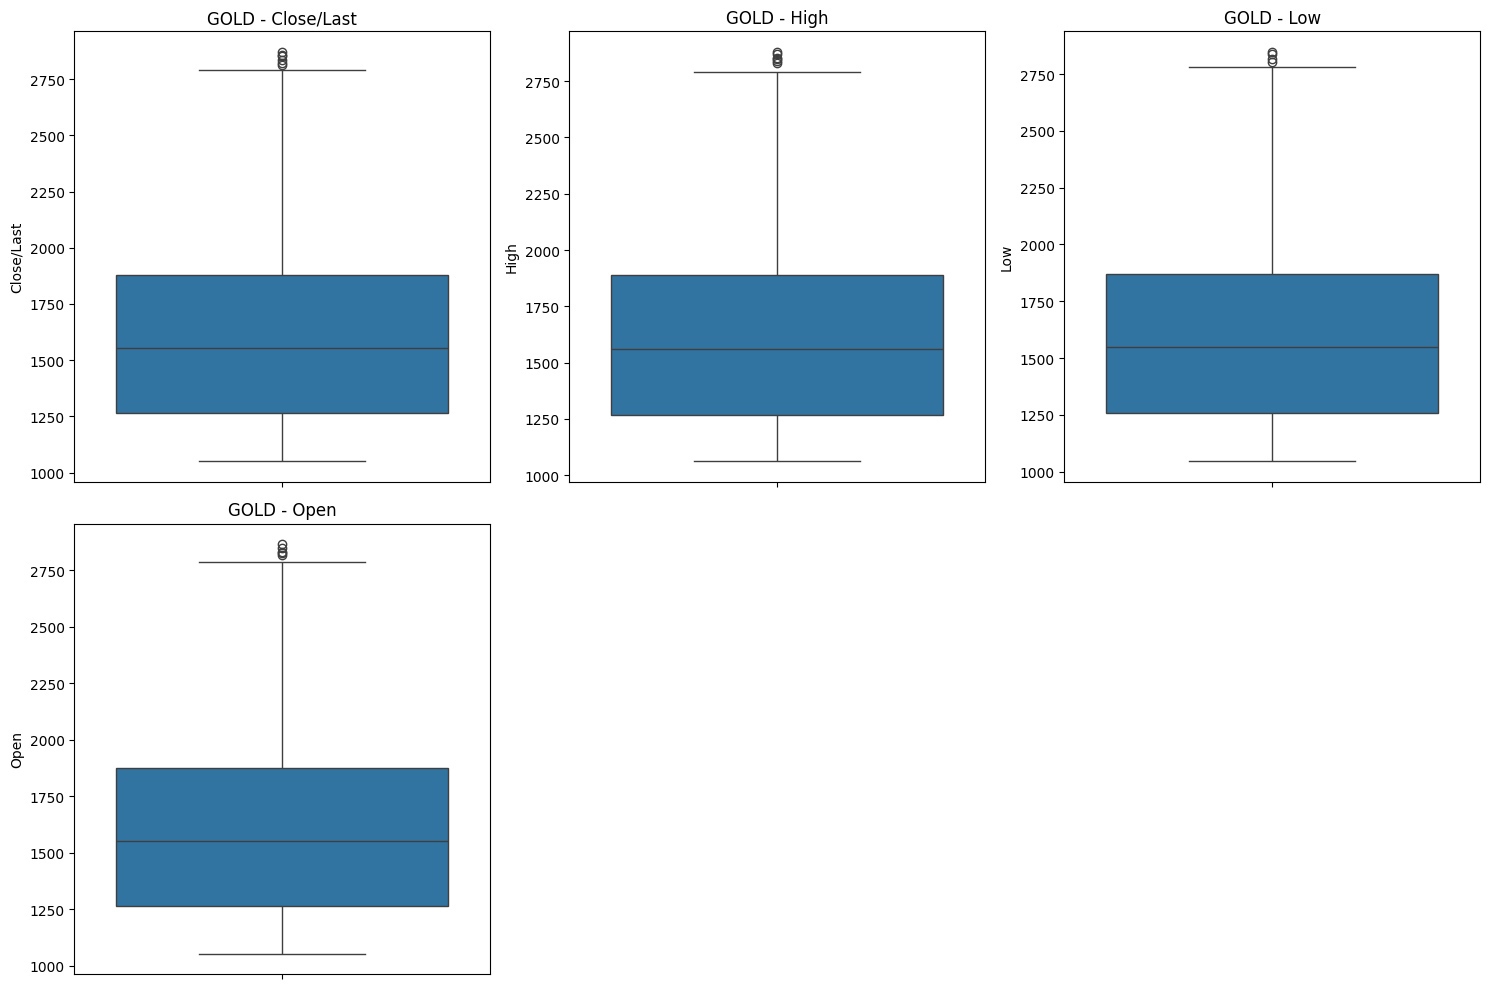

In [126]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [127]:
df_sp500 = df_sp500[~((df_sp500.iloc[:, -3:] == 0.00).all(axis=1))]
print(df_sp500.head())
print("Lignes où les 3 dernières colonnes étaient à 0.00 supprimées !")

        Date  Close/Last     Open     High      Low
0 2025-02-07     6025.99  6083.13  6101.28  6019.96
1 2025-02-06     6083.57  6072.22  6084.03  6046.83
2 2025-02-05     6061.48  6020.45  6062.86  6007.06
3 2025-02-04     6037.88  5998.14  6042.48  5990.87
4 2025-02-03     5994.57  5969.65  6022.13  5923.93
Lignes où les 3 dernières colonnes étaient à 0.00 supprimées !


In [128]:
# Correction des dates pour df_btc
df_btc["Date"] = pd.to_datetime(df_btc["Date"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")

# Correction des dates pour df_sp500
df_sp500["Date"] = pd.to_datetime(df_sp500["Date"], format="%m/%d/%Y").dt.strftime("%d/%m/%Y")

# Vérification après conversion
print(df_btc.head())
print(df_sp500.head())

print("✅ Les dates ont été converties au format JJ/MM/AAAA !")


         Date  Close/Last     Open     High      Low
0  09/02/2025     96852.7  96218.7  97297.8  96369.0
1  08/02/2025     96623.3  95981.2  96862.8  95716.1
2  07/02/2025     96402.1  97460.6  96862.8  96237.1
3  06/02/2025     97467.5  97623.4  97872.2  96424.2
4  05/02/2025     97631.2  98042.5  97824.0  96510.6
         Date  Close/Last     Open     High      Low
0  07/02/2025     6025.99  6083.13  6101.28  6019.96
1  06/02/2025     6083.57  6072.22  6084.03  6046.83
2  05/02/2025     6061.48  6020.45  6062.86  6007.06
3  04/02/2025     6037.88  5998.14  6042.48  5990.87
4  03/02/2025     5994.57  5969.65  6022.13  5923.93
✅ Les dates ont été converties au format JJ/MM/AAAA !


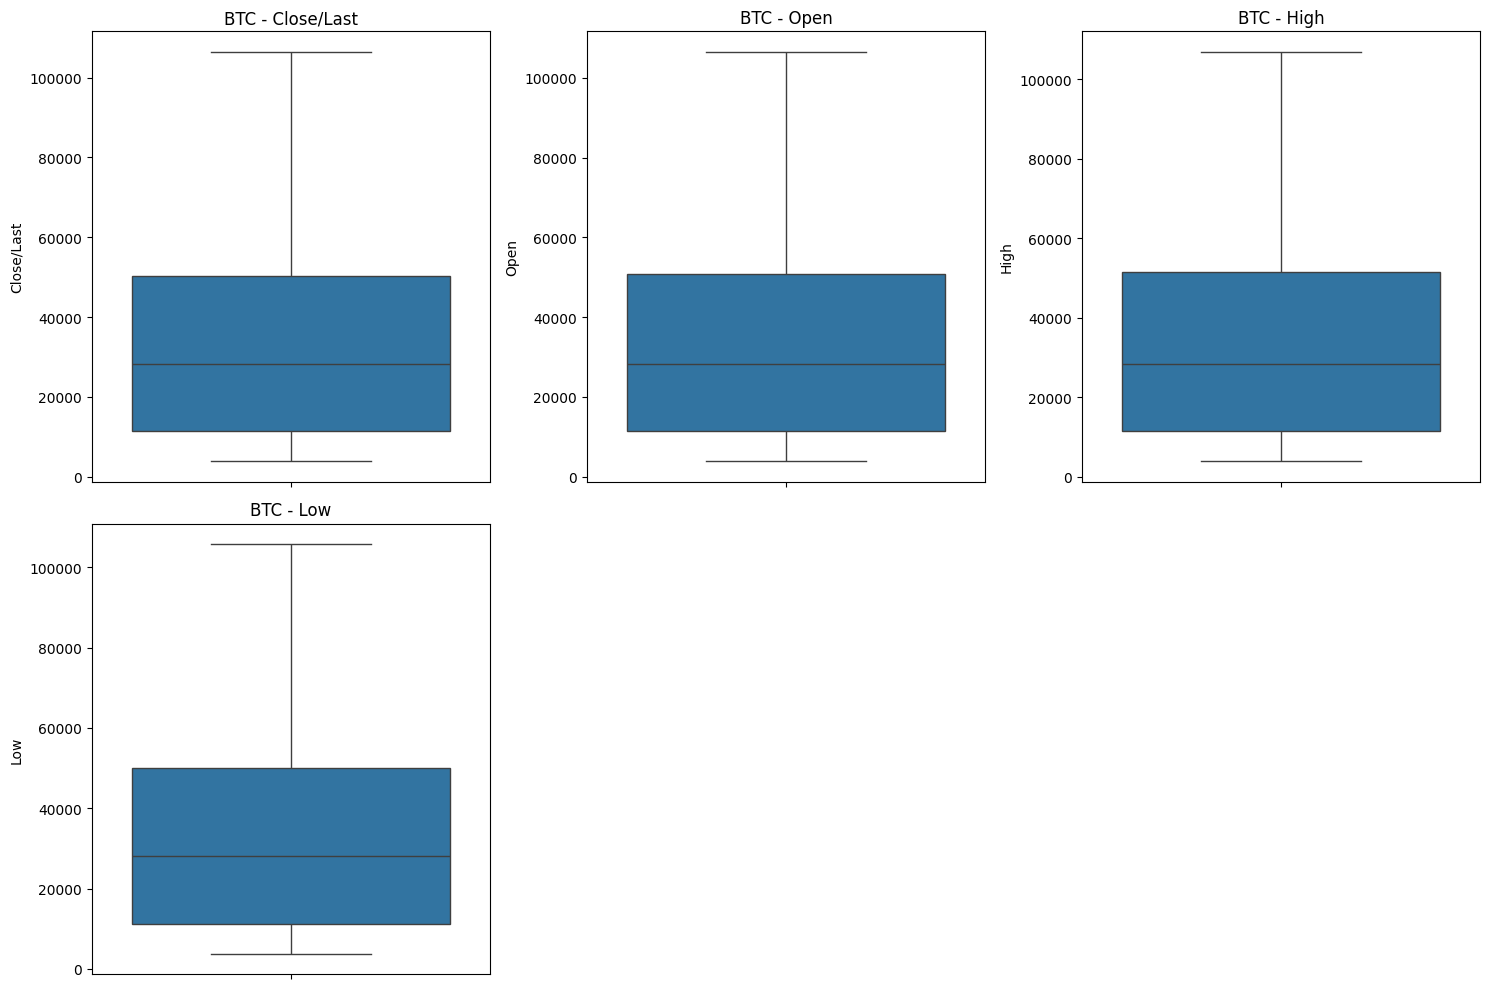

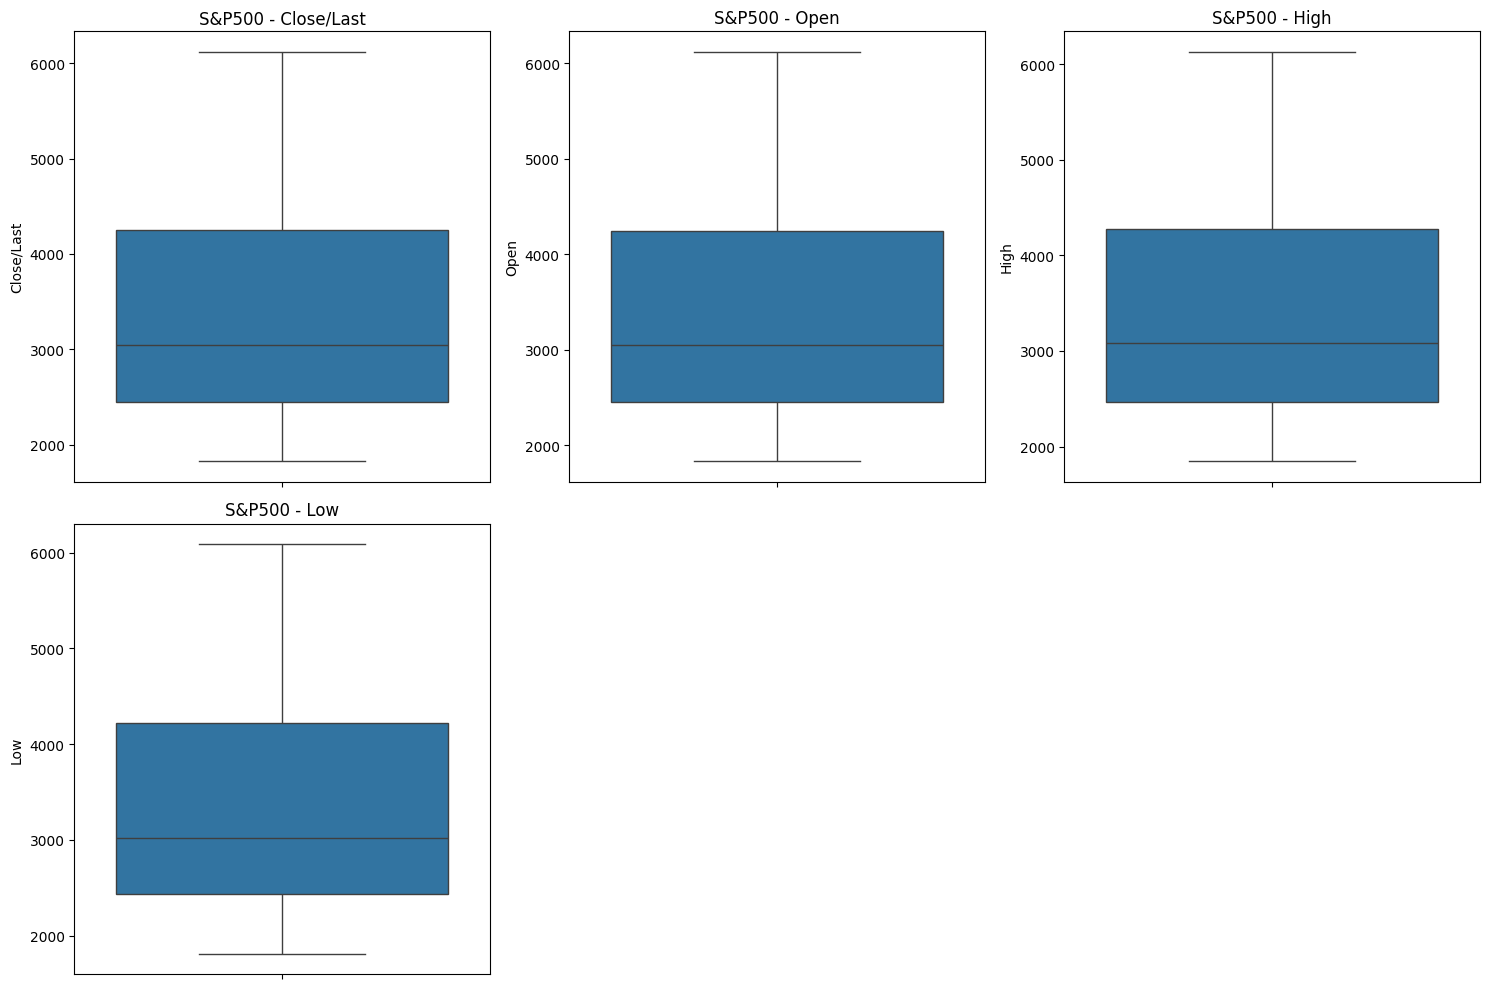

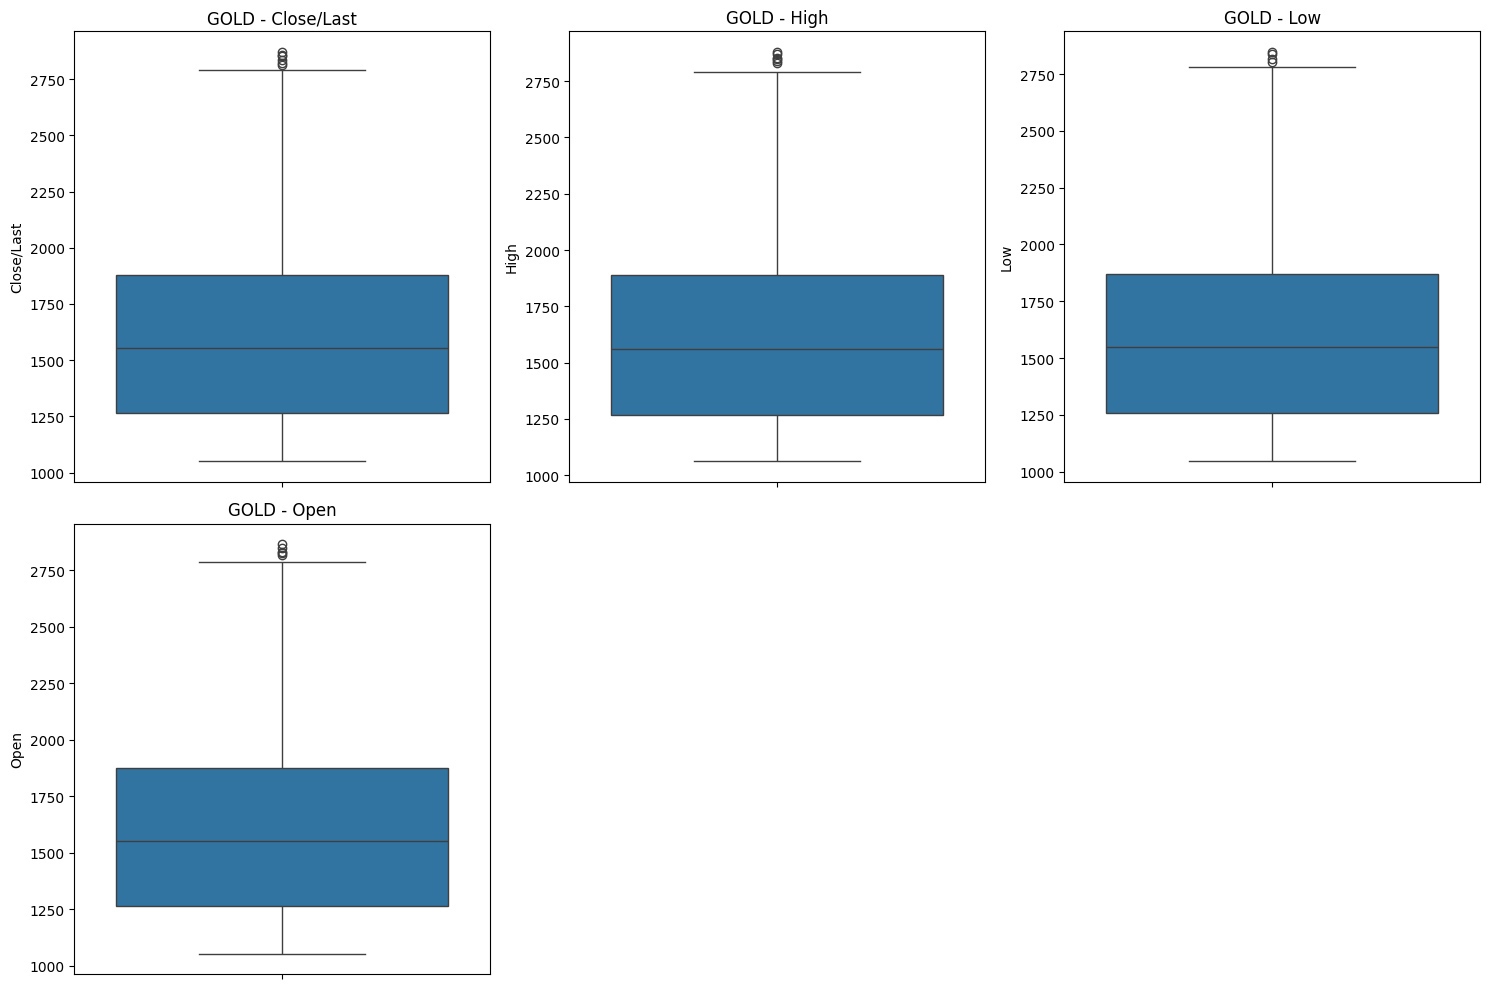

In [129]:
def plot_boxplots(df, asset_name):
    # Sélectionner les colonnes numériques
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Définir le nombre de subplots
    ncols = 3
    nrows = (len(numeric_cols) // ncols) + (1 if len(numeric_cols) % ncols else 0)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flatten()  # Faciliter l'itération
    
    for i, col in enumerate(numeric_cols):
        # Supprimer les valeurs manquantes pour éviter les erreurs
        data = df[col].dropna()
        # Vérifier que la série n'est pas vide
        if data.empty:
            print(f"La colonne {col} est vide après suppression des NaN. Box plot ignoré.")
            continue
        
        # Optionnel : si la colonne ne contient qu'une seule valeur unique, avertir ou passer
        if data.nunique() == 1:
            print(f"La colonne {col} ne contient qu'une valeur unique. Box plot peut être peu informatif.")
        
        try:
            sns.boxplot(y=data, ax=axes[i])
            axes[i].set_title(f"{asset_name} - {col}")
            axes[i].set_ylabel(col)
        except ValueError as e:
            # En cas d'erreur, afficher un message et passer à la colonne suivante
            print(f"Erreur pour la colonne {col} : {e}")
    
    # Supprimer les axes inutilisés, s'il y en a
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec vos DataFrames déjà chargés et indexés sur 'Date'
# df_btc = pd.read_csv('btc.csv', parse_dates=['Date']).set_index('Date')
# df_sp500 = pd.read_csv('sp500.csv', parse_dates=['Date']).set_index('Date')
# df_gold = pd.read_csv('gold.csv', parse_dates=['Date']).set_index('Date')

plot_boxplots(df_btc, "BTC")
plot_boxplots(df_sp500, "S&P500")
plot_boxplots(df_gold, "GOLD")

In [130]:
import matplotlib.pyplot as plt

In [131]:
for df in [df_btc, df_sp500, df_gold]:
    if "Date" in df.columns:
        df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", dayfirst=True)  # Correction du format
    else:
        print("⚠️ La colonne 'Date' est absente de ce dataset :", df.columns)

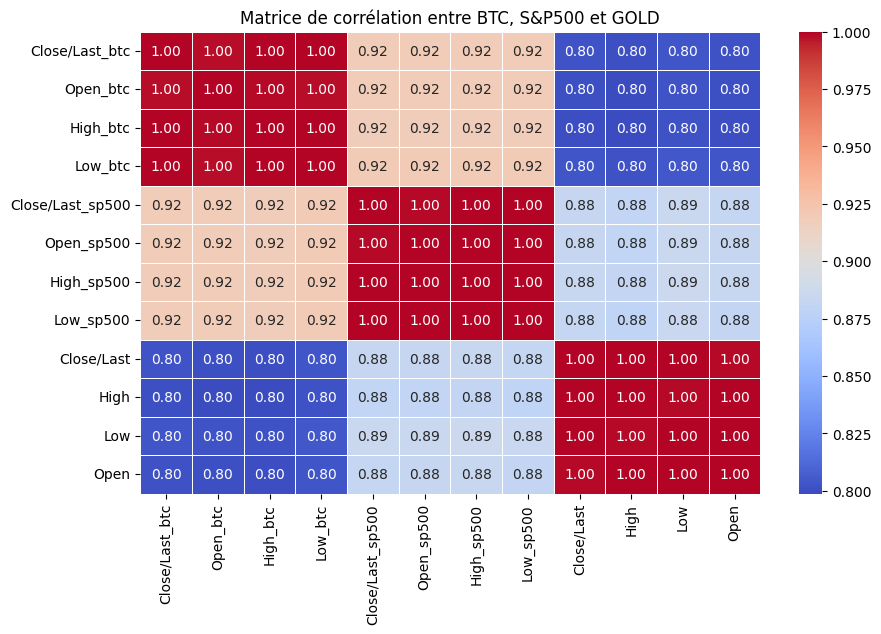

In [ ]:
# ✅ Renommer les colonnes pour éviter les conflits après fusion
df_btc.rename(columns={"Close/Last": "BTC_Close", "Open": "BTC_Open", "High": "BTC_High", "Low": "BTC_Low"}, inplace=True)
df_sp500.rename(columns={"Close/Last": "SP500_Close", "Open": "SP500_Open", "High": "SP500_High", "Low": "SP500_Low"}, inplace=True)
df_gold.rename(columns={"Close/Last": "Gold_Close", "Open": "Gold_Open", "High": "Gold_High", "Low": "Gold_Low"}, inplace=True)

# ✅ Fusionner les datasets sur la colonne "Date"
df_merged = df_btc.merge(df_sp500, on="Date").merge(df_gold, on="Date")

# ✅ Vérification des données après fusion
print(df_merged.head())

# ✅ Sélectionner uniquement les colonnes numériques pour la corrélation
df_corr = df_merged.drop(columns=["Date"])

# ✅ Calcul de la matrice de corrélation
corr_matrix = df_corr.corr()

# ✅ Affichage avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre BTC, S&P500 et GOLD")
plt.show()


<Axes: >

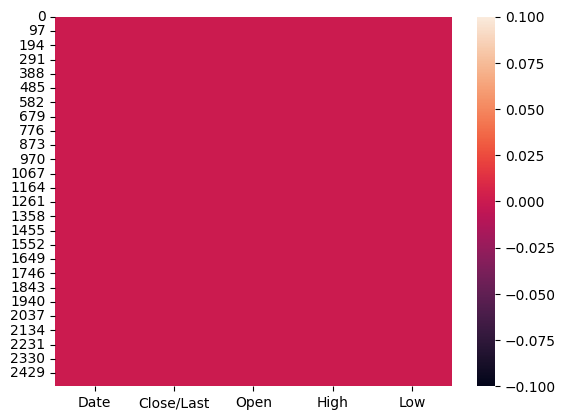

In [133]:
sns.heatmap(df_sp500.isnull())


In [134]:
 #plt.figure(figsize=(10, 6))
 #sns.boxplot(x=df_sp500['Close/Last'])
 #plt.title("Box Plot du prix BTC")
 #plt.xlabel("Prix BTC")
 #plt.show()
 

In [135]:
#Fonction pour calculer les rendements
def compute_returns(df, asset_name):
    df["Date"] = pd.to_datetime(df["Date"])  # Convertir la colonne Date en format datetime
    df = df.sort_values("Date")  # Trier les données par date
    df = df.set_index("Date")  # Définir la colonne Date comme index

    # Vérifier si la colonne de prix existe (remplace "Close/Last" par le vrai nom si différent)
    price_col = "Close/Last"  
    if price_col not in df.columns:
        print(f"❌ Erreur : La colonne '{price_col}' n'existe pas dans {asset_name}.")
        print("🛠 Voici les colonnes disponibles :", df.columns)
        return df  # Retourne le DataFrame sans calculer les rendements

    # Calcul des rendements
    df["Daily Return"] = df[price_col].pct_change()
    df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
    df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()

    # Affichage des rendements moyens
    print(f"\n📊 Rendements moyens pour {asset_name}:")
    print(f"✅ Quotidien: {df['Daily Return'].mean():.4%}")
    print(f"✅ Mensuel: {df['Monthly Return'].mean():.4%}")
    print(f"✅ Annuel: {df['Annual Return'].mean():.4%}")

    return df


In [136]:
# Charger les fichiers avec les bons chemins
#btc_df = pd.read_csv("../CSV/BTC.csv")
#sp500_df = pd.read_csv(sp500_df = pd.read_csv(r"/Users/martinvalentine/Desktop/EPITECH/piscine 1 spe data/Groupe1_DataBI_Ftech/Groupe1_DataBI_Ftech/CSV/S&P500.csv")
#gold_df = pd.read_csv("../CSV/XAU(GOLD).csv")

# Appliquer la fonction à chaque actif
df_btc = compute_returns(df_btc, "Bitcoin (BTC)")
df_sp500 = compute_returns(df_sp500, "S&P 500")
df_gold = compute_returns(df_gold, "Gold (XAU)")


📊 Rendements moyens pour Bitcoin (BTC):
✅ Quotidien: 0.2611%
✅ Mensuel: 8.5970%
✅ Annuel: 129.4423%

📊 Rendements moyens pour S&P 500:
✅ Quotidien: 0.0489%
✅ Mensuel: 0.9483%
✅ Annuel: 17.8203%

📊 Rendements moyens pour Gold (XAU):
✅ Quotidien: 0.0389%
✅ Mensuel: 0.7339%
✅ Annuel: 13.0659%


C:\Users\Jules\AppData\Local\Temp\ipykernel_35116\3689112908.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35116\3689112908.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35116\3689112908.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df["Monthly Return"] = df[price_col].resample('M').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipykernel_35116\3689112908.py:17: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df["Annual Return"] = df[price_col].resample('Y').ffill().pct_change()
C:\Users\Jules\AppData\Local\Temp\ipyk